<a href="https://colab.research.google.com/github/NadeefChowdhury/Tensorflow_5_CIFAR/blob/main/Tensorflow_5_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.datasets import cifar10

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 11s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

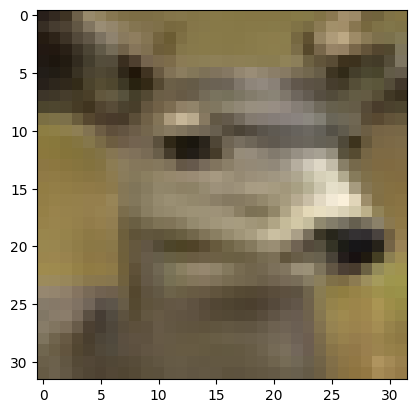

In [6]:
plt.imshow(X_train[6897])

In [7]:
X_train = X_train/255
X_test = X_test/255

In [8]:
from tensorflow.keras.utils import to_categorical


y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten


In [10]:
X_train.shape

(50000, 32, 32, 3)

In [14]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [12]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [15]:
model.fit(X_train, y_cat_train, epochs=15, validation_data=(X_test, y_cat_test),
          callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 65s 41ms/step - loss: 1.5008 - accuracy: 0.4554 - val_loss: 1.3568 - val_accuracy: 0.5177
Epoch 2/15
1563/1563 [==============================] - 64s 41ms/step - loss: 1.1727 - accuracy: 0.5857 - val_loss: 1.1002 - val_accuracy: 0.6147
Epoch 3/15
1563/1563 [==============================] - 63s 40ms/step - loss: 1.0363 - accuracy: 0.6362 - val_loss: 1.0546 - val_accuracy: 0.6304
Epoch 4/15
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9324 - accuracy: 0.6744 - val_loss: 1.0039 - val_accuracy: 0.6458
Epoch 5/15
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8442 - accuracy: 0.7048 - val_loss: 0.9625 - val_accuracy: 0.6636
Epoch 6/15
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7683 - accuracy: 0.7325 - val_loss: 0.9732 - val_accuracy: 0.6680


<Axes: >

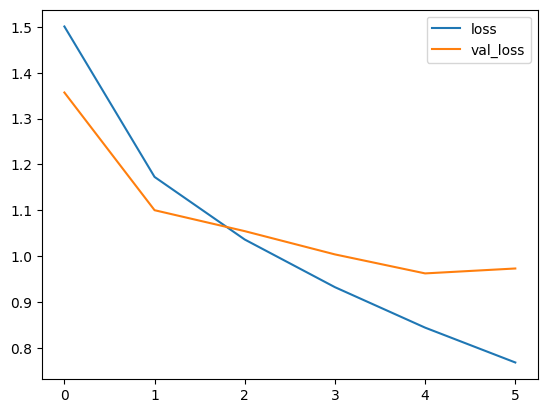

In [16]:
metrics = pd.DataFrame(model.history.history)


metrics[['loss', 'val_loss']].plot()

<Axes: >

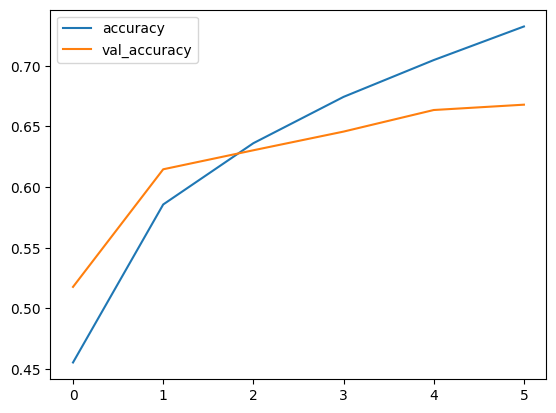

In [17]:
metrics[['accuracy', 'val_accuracy']].plot()

In [18]:
predictions = (model.predict(X_test) > 0.5).astype("int32")


313/313 [==============================] - 6s 20ms/step


In [19]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_cat_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72      1000
           1       0.83      0.75      0.79      1000
           2       0.71      0.44      0.55      1000
           3       0.52      0.46      0.49      1000
           4       0.71      0.52      0.60      1000
           5       0.72      0.40      0.51      1000
           6       0.81      0.69      0.75      1000
           7       0.76      0.66      0.70      1000
           8       0.83      0.70      0.76      1000
           9       0.87      0.60      0.71      1000

   micro avg       0.75      0.59      0.66     10000
   macro avg       0.75      0.59      0.66     10000
weighted avg       0.75      0.59      0.66     10000
 samples avg       0.59      0.59      0.59     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
